In [1]:
import math
import pandas as pd
import tensorflow as tf
# import keras_tuner.tuners as kt
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import pickle
# from sklearn.datasets import fetch_california_housing

# https://www.analyticsvidhya.com/blog/2021/06/dimensionality-reduction-using-autoencoders-in-python/#:~:text=AutoEncoder%20is%20an%20unsupervised%20Artificial,representation%20of%20the%20input%20data.


# Sequencing data

In [2]:
# hundred = pd.read_csv('hundred_patients.csv')
hundred = pd.read_csv('hundred_patients_cd.csv')
hundred = hundred.set_index("Gene_Symbol")
hundred

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAC,-0.88125,-8.385900,-3.4765,0.47600,-6.86090,-3.75730,-4.744800,-0.044202,-2.506500,0.006241,...,-1.031600,1.162300,0.199200,0.23903,1.361500,-0.934720,-0.24844,-5.22890,-0.680680,-1.489900
APOA1,-3.04650,-9.361700,-2.6363,0.93493,-6.47840,-5.87150,-9.417700,-0.653090,-4.268600,-0.835050,...,-0.569040,0.744860,0.200140,-0.15932,1.051600,-1.207500,-1.06850,-7.45590,0.396090,-2.945300
APOA4,-0.91813,-7.169600,-2.6486,0.19887,-7.48180,-3.04140,-7.560500,-0.947140,-1.662300,-0.893450,...,-0.829470,0.546240,0.532340,-0.29898,0.265380,-0.071699,-1.20620,-6.29720,0.225200,-1.919800
APOB,-1.31280,-7.415800,-2.5412,1.91080,-7.06560,-3.72960,-6.837700,0.335400,-3.110900,-0.016976,...,-0.000025,1.025300,0.417150,0.14618,1.016900,0.075990,-0.44267,-5.48050,-0.043606,-2.899300
APOC3,-1.27750,-8.088000,-2.1691,0.80647,-7.22960,-3.86730,-8.254200,-0.466340,-1.608800,-0.302970,...,-0.581970,0.590720,0.047763,-0.39229,0.535160,-0.996560,-1.30290,-7.37030,0.002768,-1.891600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AQP4,3.67180,4.331400,3.2695,3.83770,4.70440,3.31140,3.357900,4.160100,3.559500,5.819600,...,0.930330,0.637640,0.000000,0.00000,0.000000,0.000000,1.31810,0.00000,0.000000,0.000000
LOC100421816,0.00000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
KRTAP10_9,0.00000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


In [3]:
hundred = hundred.T
hundred

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
1_CD_plain,-0.88125,-3.04650,-0.918130,-1.312800,-1.277500,6.32150,-3.50560,5.42790,3.30580,-1.70320,...,0.00000,0.0,0.157760,0.0,0.0,3.6718,0.0,0.0,0.0,-0.519150
2_CD_plain,-8.38590,-9.36170,-7.169600,-7.415800,-8.088000,9.67970,-5.17740,-0.42569,8.04170,-5.07250,...,0.00000,0.0,0.031848,0.0,0.0,4.3314,0.0,0.0,0.0,-0.085717
3_CD_plain,-3.47650,-2.63630,-2.648600,-2.541200,-2.169100,7.92790,-4.07780,7.18170,5.55740,-4.25090,...,0.00000,0.0,-0.112730,0.0,0.0,3.2695,0.0,0.0,0.0,-0.177500
4_CD_plain,0.47600,0.93493,0.198870,1.910800,0.806470,0.22229,-0.52026,-2.39740,-2.62100,0.84513,...,1.85790,0.0,-0.219330,0.0,0.0,3.8377,0.0,0.0,0.0,-0.561240
5_CD_plain,-6.86090,-6.47840,-7.481800,-7.065600,-7.229600,9.27050,-5.17740,0.88511,7.74180,-5.39240,...,0.31213,0.0,-0.739550,0.0,0.0,4.7044,0.0,0.0,0.0,-0.342020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121_control,-0.93472,-1.20750,-0.071699,0.075990,-0.996560,4.89670,1.88000,1.25710,-0.30353,0.07381,...,0.00000,0.0,-0.063079,0.0,0.0,0.0000,0.0,0.0,0.0,-0.153260
180_control,-0.24844,-1.06850,-1.206200,-0.442670,-1.302900,0.72500,-2.27430,-2.21660,1.06760,-0.13725,...,0.31808,0.0,-0.320240,0.0,0.0,1.3181,0.0,0.0,0.0,-0.280380
139_CD_deep_ulcer,-5.22890,-7.45590,-6.297200,-5.480500,-7.370300,9.03570,-3.91130,1.55580,7.39930,-4.61280,...,0.00000,0.0,0.215050,0.0,0.0,0.0000,0.0,0.0,0.0,0.198070
237_CD_plain,-0.68068,0.39609,0.225200,-0.043606,0.002768,5.92230,-0.31168,2.62370,1.93600,-0.93539,...,0.00000,0.0,0.051677,0.0,0.0,0.0000,0.0,0.0,0.0,-0.017263


## Data pre-processing

In [4]:
shuffled_df = hundred.sample(frac=1)
# shuffled_df.drop(columns=shuffled_df.columns[-1], 
#         axis=1, 
#         inplace=True)
shuffled_df

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
3_CD_plain,-3.476500,-2.63630,-2.64860,-2.541200,-2.16910,7.927900,-4.0778,7.18170,5.5574,-4.25090,...,0.00000,0.0,-0.112730,0.0,0.0,3.26950,0.0,0.0,0.00000,-0.177500
99_CD_deep_ulcer,-7.632700,-9.09390,-8.62440,-8.404900,-7.99380,6.679600,-5.1774,9.89630,6.2931,-5.42230,...,0.00000,0.0,-0.033472,0.0,0.0,0.00000,0.0,0.0,0.00000,-0.027622
274_CD_plain,0.770220,0.13318,0.90559,0.896040,0.17147,0.088977,-1.7468,2.79120,-2.7543,1.12360,...,0.00000,0.0,-0.004274,0.0,0.0,0.00000,0.0,0.0,0.00000,-0.262600
41_control,-0.254170,1.02520,0.62230,-1.384800,0.81671,0.439030,3.2333,-2.53470,0.2034,-1.92170,...,0.00000,0.0,0.503720,0.0,0.0,0.00000,0.0,0.0,0.00000,0.484790
12_CD_plain,0.006241,-0.83505,-0.89345,-0.016976,-0.30297,2.118000,-3.1443,-0.82362,2.7092,0.49788,...,0.00000,0.0,-0.130210,0.0,0.0,5.81960,0.0,0.0,0.00000,-0.396300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161_CD_plain,-3.942100,-4.09500,-3.53960,-3.675700,-3.28150,4.321800,-5.1774,1.43370,5.8400,-2.53140,...,0.50893,0.0,0.088449,0.0,0.0,2.83090,0.0,0.0,0.00000,0.305200
196_CD_deep_ulcer,-4.152300,-6.40680,-5.99870,-5.207600,-6.10330,8.015000,-5.1774,5.99890,3.1716,-5.18840,...,0.00000,0.0,-0.190190,0.0,0.0,0.00000,0.0,0.0,0.00000,-0.158670
252_CD_deep_ulcer,-3.028700,-3.36070,-2.97460,-1.912300,-3.02230,7.672800,-2.8833,3.08950,6.5717,-2.12890,...,2.07990,0.0,0.061028,0.0,0.0,0.00000,0.0,0.0,0.00000,0.039406
21_CD_deep_ulcer,-8.207200,-5.51470,-5.55470,-7.677300,-5.00670,11.129200,-5.1774,0.40380,7.7885,-6.70660,...,0.00000,0.0,0.857520,0.0,0.0,0.00000,0.0,0.0,0.00000,0.774480


In [5]:
split_pt = int(0.7*len(shuffled_df))

x_train = shuffled_df[:split_pt]
x_test = shuffled_df[split_pt:]
x_test

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
105_CD_plain,0.38016,2.31630,1.67680,-0.478360,1.852700,0.77901,-2.74640,2.96670,2.26150,0.15490,...,0.10906,0.0,0.999930,0.0,0.0,0.109060,0.0,0.0,0.00000,0.451960
169_CD_plain,-0.12220,-0.54436,0.44313,-0.145060,-0.268420,4.15950,-1.53580,1.10680,0.88973,-0.17474,...,0.00000,0.0,0.480880,0.0,0.0,0.000000,0.0,0.0,0.00000,0.057700
26_CD_plain,-1.12270,-0.83192,-1.46370,-1.694100,-1.751300,-1.91500,-0.73419,-0.23838,1.12440,-1.51760,...,0.00000,0.0,0.132260,0.0,0.0,1.073900,0.0,0.0,0.00000,0.256060
42_control,-0.42053,-1.22870,-1.40380,-1.090300,-1.750600,0.96636,2.69760,-2.53470,2.51740,-0.57655,...,0.00000,0.0,-0.084596,0.0,0.0,0.074017,0.0,0.0,0.00000,0.407700
237_CD_plain,-0.68068,0.39609,0.22520,-0.043606,0.002768,5.92230,-0.31168,2.62370,1.93600,-0.93539,...,0.00000,0.0,0.051677,0.0,0.0,0.000000,0.0,0.0,0.00000,-0.017263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161_CD_plain,-3.94210,-4.09500,-3.53960,-3.675700,-3.281500,4.32180,-5.17740,1.43370,5.84000,-2.53140,...,0.50893,0.0,0.088449,0.0,0.0,2.830900,0.0,0.0,0.00000,0.305200
196_CD_deep_ulcer,-4.15230,-6.40680,-5.99870,-5.207600,-6.103300,8.01500,-5.17740,5.99890,3.17160,-5.18840,...,0.00000,0.0,-0.190190,0.0,0.0,0.000000,0.0,0.0,0.00000,-0.158670
252_CD_deep_ulcer,-3.02870,-3.36070,-2.97460,-1.912300,-3.022300,7.67280,-2.88330,3.08950,6.57170,-2.12890,...,2.07990,0.0,0.061028,0.0,0.0,0.000000,0.0,0.0,0.00000,0.039406
21_CD_deep_ulcer,-8.20720,-5.51470,-5.55470,-7.677300,-5.006700,11.12920,-5.17740,0.40380,7.78850,-6.70660,...,0.00000,0.0,0.857520,0.0,0.0,0.000000,0.0,0.0,0.00000,0.774480


# Feature scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
# link to california housing dataset autoecncoder tutorial

def scale_datasets(x_train, x_test):
  """
  Standard Scale test and train data
  """
  standard_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      index = x_train.index,
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      index = x_test.index,
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
  
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [7]:
x_train_scaled

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
3_CD_plain,0.527036,0.515606,0.569655,0.622998,0.607236,0.655088,0.113501,0.672969,0.777042,0.234388,...,0.000000,0.0,0.183525,0.0,0.0,0.483790,0.0,0.0,0.0,0.348899
99_CD_deep_ulcer,0.147616,0.024619,0.063304,0.114107,0.170821,0.572009,0.000000,0.860986,0.839850,0.084182,...,0.000000,0.0,0.206731,0.0,0.0,0.000000,0.0,0.0,0.0,0.431083
274_CD_plain,0.914719,0.726176,0.870814,0.921305,0.782603,0.133374,0.354108,0.368878,0.067453,0.923550,...,0.000000,0.0,0.215279,0.0,0.0,0.000000,0.0,0.0,0.0,0.302235
41_control,0.821202,0.793998,0.846810,0.723359,0.830948,0.156671,0.868156,0.000000,0.319958,0.533057,...,0.000000,0.0,0.364014,0.0,0.0,0.000000,0.0,0.0,0.0,0.712060
12_CD_plain,0.844975,0.652559,0.718375,0.842068,0.747056,0.268414,0.209858,0.118511,0.533884,0.843315,...,0.000000,0.0,0.178407,0.0,0.0,0.861130,0.0,0.0,0.0,0.228922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80_control,0.789501,0.598253,0.643484,0.803143,0.625308,0.110090,0.531178,0.170487,0.433751,0.734045,...,0.000000,0.0,0.127395,0.0,0.0,0.000000,0.0,0.0,0.0,0.446860
179_CD_plain,0.728969,0.660385,0.742537,0.783560,0.704361,0.330449,0.369653,0.346486,0.558600,0.685086,...,0.112287,0.0,0.152747,0.0,0.0,0.192687,0.0,0.0,0.0,0.482958
1_CD_plain,0.763956,0.484417,0.716284,0.729607,0.674039,0.548175,0.172564,0.551499,0.584817,0.561075,...,0.000000,0.0,0.262721,0.0,0.0,0.543318,0.0,0.0,0.0,0.161558
225_CD_plain,0.644955,0.655799,0.739889,0.755826,0.795474,0.408291,0.237459,0.293224,0.599843,0.652038,...,0.093244,0.0,0.209632,0.0,0.0,0.000000,0.0,0.0,0.0,0.438304


# Autoencoder model

In [8]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv1D, Conv2D, LeakyReLU, MaxPool1D, AveragePooling1D, UpSampling1D, Flatten, Dense, Reshape, BatchNormalization
# https://towardsdatascience.com/improve-your-model-performance-with-auto-encoders-d4ee543b4154

# n_inputs = 120
# bottleneck_features = 32

class AutoEncoders(Model):

    def __init__(self, n_inputs, n_bottleneck=32):

        super().__init__()

        self.encoder = Sequential(
            [

                Input(shape=(n_inputs,)),
                # encoder level 1
                Dense(n_inputs*2),
                BatchNormalization(),
                LeakyReLU(),
                # encoder level 2
                Dense(n_inputs),
                BatchNormalization(),
                LeakyReLU(),
                # bottleneck
                Dense(n_bottleneck)
            ]
        )

        self.decoder = Sequential(
            [
                
                # define decoder, level 1
                Dense(n_inputs),
                BatchNormalization(),
                LeakyReLU(),
                # decoder level 2,
                Dense(n_inputs*2),
                BatchNormalization(),
                LeakyReLU(),
                # output layer
                Dense(n_inputs, activation='linear')
            ]
        )

    def call(self, inputs):

        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded
    


# define autoencoder model


auto_encoder = AutoEncoders(len(x_train_scaled.columns))

n_bottleneck = 32

auto_encoder = AutoEncoders(len(x_train_scaled.columns), n_bottleneck)
auto_encoder.compile(optimizer='adam', loss='mse', metrics=['mse'])


In [9]:
x_train_scaled

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
3_CD_plain,0.527036,0.515606,0.569655,0.622998,0.607236,0.655088,0.113501,0.672969,0.777042,0.234388,...,0.000000,0.0,0.183525,0.0,0.0,0.483790,0.0,0.0,0.0,0.348899
99_CD_deep_ulcer,0.147616,0.024619,0.063304,0.114107,0.170821,0.572009,0.000000,0.860986,0.839850,0.084182,...,0.000000,0.0,0.206731,0.0,0.0,0.000000,0.0,0.0,0.0,0.431083
274_CD_plain,0.914719,0.726176,0.870814,0.921305,0.782603,0.133374,0.354108,0.368878,0.067453,0.923550,...,0.000000,0.0,0.215279,0.0,0.0,0.000000,0.0,0.0,0.0,0.302235
41_control,0.821202,0.793998,0.846810,0.723359,0.830948,0.156671,0.868156,0.000000,0.319958,0.533057,...,0.000000,0.0,0.364014,0.0,0.0,0.000000,0.0,0.0,0.0,0.712060
12_CD_plain,0.844975,0.652559,0.718375,0.842068,0.747056,0.268414,0.209858,0.118511,0.533884,0.843315,...,0.000000,0.0,0.178407,0.0,0.0,0.861130,0.0,0.0,0.0,0.228922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80_control,0.789501,0.598253,0.643484,0.803143,0.625308,0.110090,0.531178,0.170487,0.433751,0.734045,...,0.000000,0.0,0.127395,0.0,0.0,0.000000,0.0,0.0,0.0,0.446860
179_CD_plain,0.728969,0.660385,0.742537,0.783560,0.704361,0.330449,0.369653,0.346486,0.558600,0.685086,...,0.112287,0.0,0.152747,0.0,0.0,0.192687,0.0,0.0,0.0,0.482958
1_CD_plain,0.763956,0.484417,0.716284,0.729607,0.674039,0.548175,0.172564,0.551499,0.584817,0.561075,...,0.000000,0.0,0.262721,0.0,0.0,0.543318,0.0,0.0,0.0,0.161558
225_CD_plain,0.644955,0.655799,0.739889,0.755826,0.795474,0.408291,0.237459,0.293224,0.599843,0.652038,...,0.093244,0.0,0.209632,0.0,0.0,0.000000,0.0,0.0,0.0,0.438304


In [10]:
history = auto_encoder.fit(
    x_train_scaled, 
    x_train_scaled, 
    epochs=100, 
    batch_size=32, 
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/100
6/6 [==============================] - 1s 45ms/step - loss: 0.5603 - mse: 0.5603 - val_loss: 0.1909 - val_mse: 0.1909
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1308 - mse: 0.1308 - val_loss: 0.1236 - val_mse: 0.1236
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0784 - mse: 0.0784 - val_loss: 0.1003 - val_mse: 0.1003
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0482 - mse: 0.0482 - val_loss: 0.1017 - val_mse: 0.1017
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.1034 - val_mse: 0.1034
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0882 - val_mse: 0.0882
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0753 - val_mse: 0.0753
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0214 - mse: 0.0214 - va

6/6 [==============================] - 0s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 65/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 66/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 67/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 68/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 69/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 70/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 71/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss

In [11]:
auto_encoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 438)               96360     
                                                                 
 batch_normalization_4 (Batc  (None, 438)              1752      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 438)               0         
                                                                 
 dense_7 (Dense)             (None, 219)               96141     
                                                                 
 batch_normalization_5 (Batc  (None, 219)              876       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 219)              

In [12]:
auto_encoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 219)               7227      
                                                                 
 batch_normalization_6 (Batc  (None, 219)              876       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 219)               0         
                                                                 
 dense_10 (Dense)            (None, 438)               96360     
                                                                 
 batch_normalization_7 (Batc  (None, 438)              1752      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 438)              

In [13]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


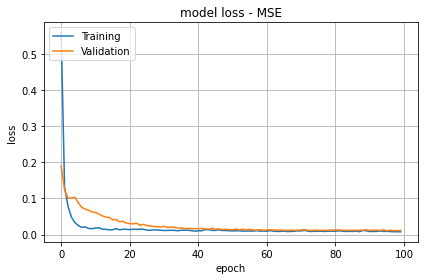

In [14]:

# summarize history for accuracy
# plt.figure()
# plt.grid()
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.tight_layout()
# plt.savefig('autoencoder_learning_curve_accuracy.png', dpi=300)
# plt.show()

# summarize history for loss
plt.figure()
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss - MSE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('autoencoder_learning_curve_loss.png', dpi=300)
plt.show()

## Encoding the dataset

In [15]:
full_dataset = pd.concat([x_train_scaled, x_test_scaled])


In [16]:
selected_patient = full_dataset.loc[full_dataset.index.str.endswith('199_CD_deep_ulcer')]
selected_patient

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
199_CD_deep_ulcer,0.354543,0.116649,0.140065,0.236529,0.218339,0.720718,0.119674,0.659041,0.811063,0.087464,...,0.0,0.0,0.271399,0.0,0.0,0.084994,0.0,0.0,0.0,0.648814


In [17]:
def encode_dataset(auto_encoder, dataset):
    latent_var = np.arange(32)
    recon = auto_encoder.encoder(dataset.values)
    r = pd.DataFrame(recon, columns=latent_var, index=dataset.index)
    return r
    
tsne_dataset = encode_dataset(auto_encoder, full_dataset)
tsne_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
3_CD_plain,0.184038,2.339928,-2.848547,2.238921,-0.098660,-2.755760,2.478440,2.870933,-5.466356,-2.026333,...,2.547081,1.383572,2.427234,2.865929,-0.163274,-3.770050,1.210512,-0.648534,1.803190,1.589187
99_CD_deep_ulcer,1.275044,1.291113,-5.610139,3.384315,2.245539,-0.819564,3.196398,5.119895,-9.695760,-0.783958,...,4.377275,3.687444,1.609472,2.005517,-0.716191,-3.060636,-1.913022,4.121701,0.436517,2.970902
274_CD_plain,-1.630861,-2.701211,1.806103,-1.766591,-0.298209,1.104201,-1.084524,-4.432734,6.683260,7.159960,...,-2.004012,-0.052921,-5.065886,-5.605465,0.750437,5.354219,-1.772298,3.064677,-1.464162,-1.131544
41_control,-1.776846,-1.675649,0.002026,-0.791054,-0.644348,0.149203,-2.156629,-2.135869,4.896315,4.508507,...,-0.299016,-2.025326,-4.034310,-3.195418,-0.485084,5.891967,-1.103716,0.657754,-2.877440,-1.110269
12_CD_plain,-1.087580,-0.409416,0.848334,-1.312025,-0.117040,0.137154,-0.625596,-2.552777,4.439072,4.934054,...,-1.151551,0.063565,-1.495467,-2.062488,-0.186146,2.601810,-0.385748,0.220722,-0.747434,-0.300530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161_CD_plain,0.553427,1.482405,-2.092350,1.215127,0.466568,-1.096624,0.362533,2.621416,-2.244193,-1.381687,...,0.524226,0.932031,1.105821,1.879601,-0.110101,-1.047359,-0.501216,1.043253,-0.471785,0.169607
196_CD_deep_ulcer,0.881301,1.928753,-3.739099,2.631689,0.668666,-1.680578,3.180453,3.282797,-6.757618,-1.740777,...,2.255735,2.134297,2.777829,2.296444,0.320221,-4.252476,-0.849981,1.127497,1.329103,2.158066
252_CD_deep_ulcer,1.305224,1.694444,-2.164611,2.650728,0.145489,-2.081185,2.233793,2.263578,-4.199594,-2.532762,...,1.930355,0.916092,1.982811,2.385948,0.424487,-3.786424,0.939309,0.797906,0.637679,0.482548
21_CD_deep_ulcer,2.028414,0.837274,-8.982298,4.798845,0.544431,-3.957136,4.613109,8.565804,-8.724510,-1.681170,...,4.314852,2.308494,1.489475,3.047104,-2.040719,-3.459915,-3.288708,3.903140,-0.773148,2.028943


## Labels

In [18]:
patient_ids = np.array(tsne_dataset.index)
patient_ids

array(['3_CD_plain', '99_CD_deep_ulcer', '274_CD_plain', '41_control',
       '12_CD_plain', '62_CD_deep_ulcer', '106_CD_deep_ulcer',
       '289_CD_plain', '177_CD_deep_ulcer', '113_CD_plain',
       '143_CD_deep_ulcer', '24_CD_plain', '163_CD_deep_ulcer',
       '133_CD_deep_ulcer', '93_CD_deep_ulcer', '37_CD_deep_ulcer',
       '11_control', '55_control', '320_CD_plain', '216_CD_deep_ulcer',
       '85_control', '222_CD_plain', '137_CD_plain', '261_CD_deep_ulcer',
       '162_CD_plain', '285_CD_plain', '72_control', '17_CD_deep_ulcer',
       '121_control', '192_CD_plain', '224_CD_plain', '102_CD_plain',
       '293_CD_plain', '159_CD_plain', '311_CD_plain',
       '218_CD_deep_ulcer', '149_CD_plain', '209_CD_plain', '180_control',
       '138_CD_deep_ulcer', '312_CD_plain', '194_CD_plain', '34_control',
       '65_control', '164_CD_plain', '206_CD_plain', '83_control',
       '202_CD_deep_ulcer', '310_CD_plain', '257_CD_deep_ulcer',
       '304_CD_plain', '19_control', '303_CD_plai

In [19]:
len(patient_ids)

260

In [20]:
def classify(x):
    if "_control" in x: # control
        return 0
    elif "CD_plain" in x: # Crohn's Disease no deep ulcer
#         print(x)
        return 1
    elif "CD_deep_ulcer" in x: # Crohn's Disease deep ulcer
#         print(x)
        return 2
    else:
        return 3 # Ulcerative Collitis

vec = np.vectorize(classify)

disease_labels = vec(patient_ids)
disease_labels

array([1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0,
       1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0,
       1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1,
       1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2,
       1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2])

## tSNE plots

In [21]:
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [22]:
no_IBD = disease_labels == 0
CD_no_ulcer = disease_labels == 1
CD_deep_ulcer = disease_labels == 2
UC = disease_labels == 3

In [23]:
tsne_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
3_CD_plain,0.184038,2.339928,-2.848547,2.238921,-0.098660,-2.755760,2.478440,2.870933,-5.466356,-2.026333,...,2.547081,1.383572,2.427234,2.865929,-0.163274,-3.770050,1.210512,-0.648534,1.803190,1.589187
99_CD_deep_ulcer,1.275044,1.291113,-5.610139,3.384315,2.245539,-0.819564,3.196398,5.119895,-9.695760,-0.783958,...,4.377275,3.687444,1.609472,2.005517,-0.716191,-3.060636,-1.913022,4.121701,0.436517,2.970902
274_CD_plain,-1.630861,-2.701211,1.806103,-1.766591,-0.298209,1.104201,-1.084524,-4.432734,6.683260,7.159960,...,-2.004012,-0.052921,-5.065886,-5.605465,0.750437,5.354219,-1.772298,3.064677,-1.464162,-1.131544
41_control,-1.776846,-1.675649,0.002026,-0.791054,-0.644348,0.149203,-2.156629,-2.135869,4.896315,4.508507,...,-0.299016,-2.025326,-4.034310,-3.195418,-0.485084,5.891967,-1.103716,0.657754,-2.877440,-1.110269
12_CD_plain,-1.087580,-0.409416,0.848334,-1.312025,-0.117040,0.137154,-0.625596,-2.552777,4.439072,4.934054,...,-1.151551,0.063565,-1.495467,-2.062488,-0.186146,2.601810,-0.385748,0.220722,-0.747434,-0.300530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161_CD_plain,0.553427,1.482405,-2.092350,1.215127,0.466568,-1.096624,0.362533,2.621416,-2.244193,-1.381687,...,0.524226,0.932031,1.105821,1.879601,-0.110101,-1.047359,-0.501216,1.043253,-0.471785,0.169607
196_CD_deep_ulcer,0.881301,1.928753,-3.739099,2.631689,0.668666,-1.680578,3.180453,3.282797,-6.757618,-1.740777,...,2.255735,2.134297,2.777829,2.296444,0.320221,-4.252476,-0.849981,1.127497,1.329103,2.158066
252_CD_deep_ulcer,1.305224,1.694444,-2.164611,2.650728,0.145489,-2.081185,2.233793,2.263578,-4.199594,-2.532762,...,1.930355,0.916092,1.982811,2.385948,0.424487,-3.786424,0.939309,0.797906,0.637679,0.482548
21_CD_deep_ulcer,2.028414,0.837274,-8.982298,4.798845,0.544431,-3.957136,4.613109,8.565804,-8.724510,-1.681170,...,4.314852,2.308494,1.489475,3.047104,-2.040719,-3.459915,-3.288708,3.903140,-0.773148,2.028943


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

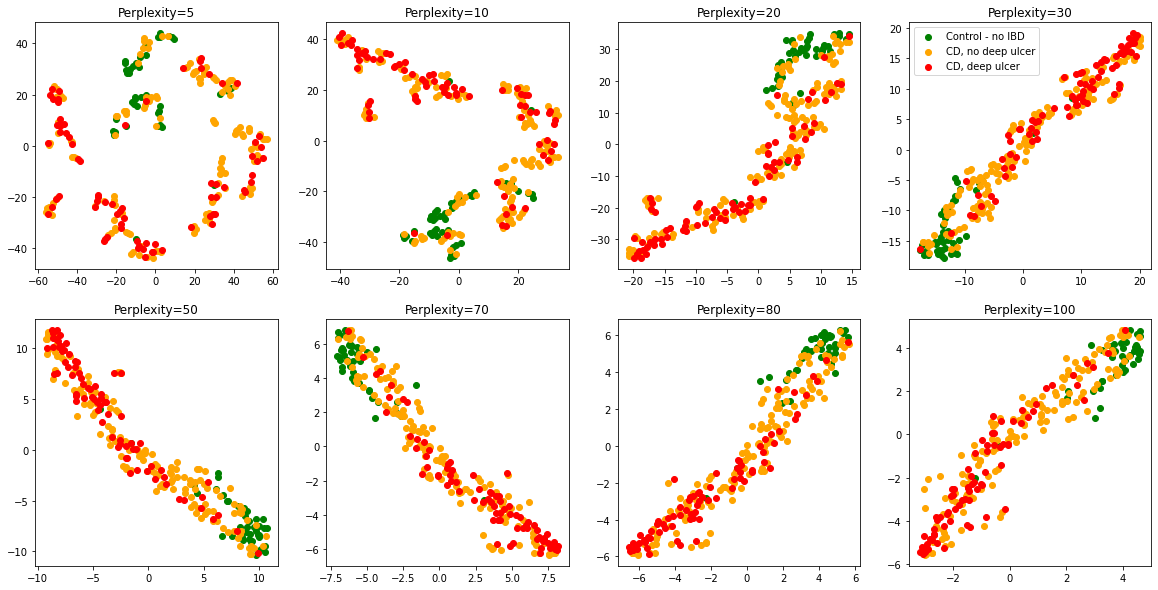

In [24]:
def plot_tsne(tsne_dataset, selected_patient_idx=None):
    n_samples = 260
    n_components = 2

    (fig, subplots) = plt.subplots(2, 4, figsize=(20, 10))
    perplexities = [5, 10, 20, 30]

    for i, perplexity in enumerate(perplexities):
        ax = subplots[0][i]

        t0 = time()
        tsne = manifold.TSNE(
            n_components=n_components,
            init="random",
            random_state=0,
            perplexity=perplexity,
            n_iter=750,
            method='exact'
        )
        Y = tsne.fit_transform(tsne_dataset)
        t1 = time()
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[no_IBD, 0], Y[no_IBD, 1], c="g", label="Control - no IBD")
        ax.scatter(Y[CD_no_ulcer, 0], Y[CD_no_ulcer, 1], c="orange", label="CD, no deep ulcer")
        ax.scatter(Y[CD_deep_ulcer, 0], Y[CD_deep_ulcer, 1], c="r", label="CD, deep ulcer")
        
        if selected_patient_idx is not None:
            ax.scatter(Y[selected_patient_idx, 0], Y[selected_patient_idx, 1], c="cyan", s=500, marker='*',edgecolor='black', linewidth=.7, label="Selected patient")
    #     ax.scatter(Y[UC, 0], Y[UC, 1], c="brown", label="UC")

        if i == 3:
            ax.legend()

        ax.axis("tight")

    perplexities = [50, 70, 80, 100]
    for i, perplexity in enumerate(perplexities):
        ax = subplots[1][i]

        t0 = time()
        tsne = manifold.TSNE(
            n_components=n_components,
            init="random",
            random_state=0,
            perplexity=perplexity,
            n_iter=1000,
            method='exact'
        )
        Y = tsne.fit_transform(tsne_dataset)
        t1 = time()
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[no_IBD, 0], Y[no_IBD, 1], c="g")
        ax.scatter(Y[CD_no_ulcer, 0], Y[CD_no_ulcer, 1], c="orange")
        ax.scatter(Y[CD_deep_ulcer, 0], Y[CD_deep_ulcer, 1], c="r")
        
        if selected_patient_idx is not None:
            ax.scatter(Y[selected_patient_idx, 0], Y[selected_patient_idx, 1], c="cyan", s=500, marker='*',edgecolor='black', linewidth=.7, label="Selected patient")
    #     ax.scatter(Y[UC, 0], Y[UC, 1], c="brown", label="UC")

        ax.axis("tight")

plot_tsne(tsne_dataset)

# Class contrastive explainability

## CD Deep Ulcer patient

In [25]:
pid = '199_CD_deep_ulcer'
selected_patient = full_dataset.loc[full_dataset.index.str.endswith(pid)]
selected_patient

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
199_CD_deep_ulcer,0.354543,0.116649,0.140065,0.236529,0.218339,0.720718,0.119674,0.659041,0.811063,0.087464,...,0.0,0.0,0.271399,0.0,0.0,0.084994,0.0,0.0,0.0,0.648814


In [26]:
ind = full_dataset.index
selected_patient_idx = ind.get_loc(pid)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

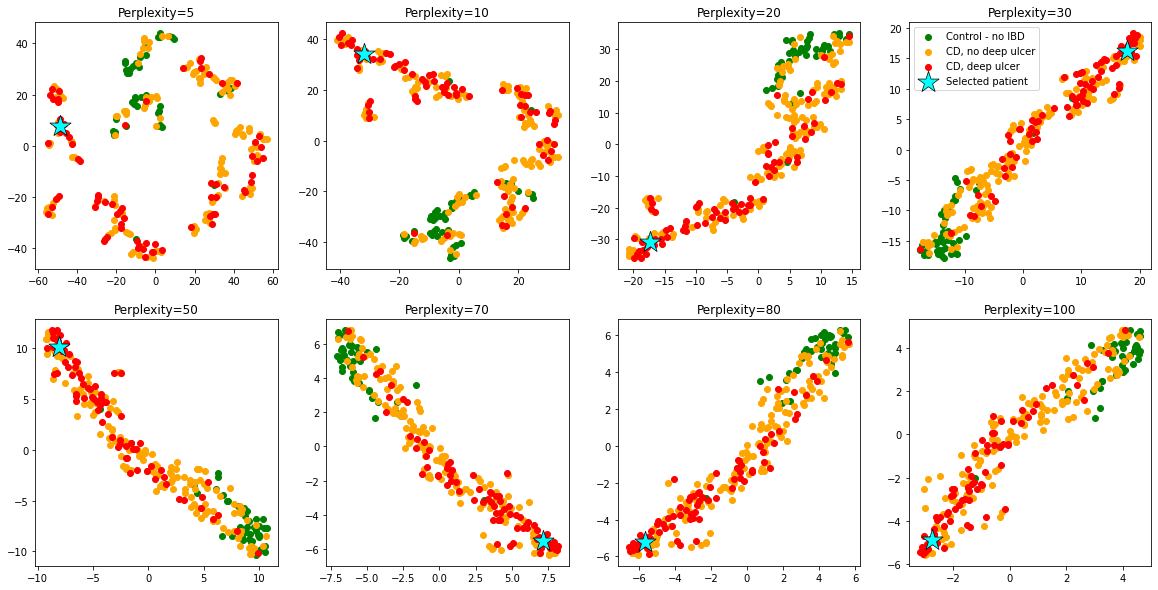

In [27]:


plot_tsne(tsne_dataset, selected_patient_idx)

## Gene expression distributions (post scaling)

In [28]:
full_dataset

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
3_CD_plain,0.527036,0.515606,0.569655,0.622998,0.607236,0.655088,0.113501,0.672969,0.777042,0.234388,...,0.000000,0.0,0.183525,0.0,0.0,0.483790,0.0,0.0,0.000000,0.348899
99_CD_deep_ulcer,0.147616,0.024619,0.063304,0.114107,0.170821,0.572009,0.000000,0.860986,0.839850,0.084182,...,0.000000,0.0,0.206731,0.0,0.0,0.000000,0.0,0.0,0.000000,0.431083
274_CD_plain,0.914719,0.726176,0.870814,0.921305,0.782603,0.133374,0.354108,0.368878,0.067453,0.923550,...,0.000000,0.0,0.215279,0.0,0.0,0.000000,0.0,0.0,0.000000,0.302235
41_control,0.821202,0.793998,0.846810,0.723359,0.830948,0.156671,0.868156,0.000000,0.319958,0.533057,...,0.000000,0.0,0.364014,0.0,0.0,0.000000,0.0,0.0,0.000000,0.712060
12_CD_plain,0.844975,0.652559,0.718375,0.842068,0.747056,0.268414,0.209858,0.118511,0.533884,0.843315,...,0.000000,0.0,0.178407,0.0,0.0,0.861130,0.0,0.0,0.000000,0.228922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161_CD_plain,0.484531,0.404697,0.494158,0.524539,0.523890,0.415087,0.000000,0.274856,0.801168,0.454877,...,0.079681,0.0,0.242427,0.0,0.0,0.418890,0.0,0.0,0.000000,0.613584
196_CD_deep_ulcer,0.465342,0.228926,0.285789,0.391590,0.312467,0.660885,0.000000,0.591047,0.573360,0.114174,...,0.000000,0.0,0.160846,0.0,0.0,0.000000,0.0,0.0,0.000000,0.359224
252_CD_deep_ulcer,0.567915,0.460528,0.542032,0.677579,0.543310,0.638110,0.236798,0.389539,0.863635,0.506488,...,0.325641,0.0,0.234399,0.0,0.0,0.000000,0.0,0.0,0.000000,0.467838
21_CD_deep_ulcer,0.095170,0.296754,0.323411,0.177253,0.394629,0.868149,0.000000,0.203524,0.967516,-0.080502,...,0.000000,0.0,0.467602,0.0,0.0,0.000000,0.0,0.0,0.000000,0.870909


In [29]:
hundred_control = full_dataset.loc[full_dataset.index.str.endswith('_control')]
hundred_CD_plain = full_dataset.loc[full_dataset.index.str.endswith('_CD_plain')]
hundred_CD_deep_ulcer = full_dataset.loc[full_dataset.index.str.endswith('_CD_deep_ulcer')]
datasets = [hundred_control, hundred_CD_plain, hundred_CD_deep_ulcer]
labels = ["Control", "Crohn's Disease", "Crohn's Disease Deep Ulcer"]
colours = ["green", "orange", "red"]

In [30]:
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# import math

# for gene_symbol in all_genes:
#     for i in range(len(datasets)):
#         ds = datasets[i]
#         label = labels[i]
#         colour = colours[i]
#         vals = ds[gene_symbol].values
#         gene_stats = ds.describe()
#         g_mean = gene_stats.loc["mean", gene_symbol]
#         g_std = gene_stats.loc["std", gene_symbol]
#         g_min = gene_stats.loc["min", gene_symbol]
#         g_max = gene_stats.loc["max", gene_symbol]

#         mu = g_mean
#         variance = g_std**2
#         sigma = math.sqrt(variance)
#         x = np.linspace(g_min, g_max, 100)
#         plt.plot(x, stats.norm.pdf(x, mu, sigma), label=label, c=colour)

#         if i<4:
#             plt.hist(vals, bins=25, density=True, alpha=0.6, color=colour)
#     plt.title(gene_symbol+" Distributions")
#     plt.xlabel('Gene expression (FPKM)')
#     plt.ylabel('Probability density')
#     plt.legend()
#     plt.show()

### Modify gene expressions for the selected patient - 60 genes

In [31]:

selected_patient = full_dataset.loc[full_dataset.index.str.endswith(pid)]
selected_patient

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
199_CD_deep_ulcer,0.354543,0.116649,0.140065,0.236529,0.218339,0.720718,0.119674,0.659041,0.811063,0.087464,...,0.0,0.0,0.271399,0.0,0.0,0.084994,0.0,0.0,0.0,0.648814


In [32]:
with open("most_diff_genes_60", "rb") as fp:   # Unpickling
    most_diff_genes_60 = pickle.load(fp)

In [33]:
def modify_expression(pid, most_diff_genes):
    for gene_symbol in most_diff_genes:
        new_val = hundred_control.describe().loc["mean", gene_symbol]
        full_dataset.loc[full_dataset.index.str.endswith(pid), gene_symbol] = new_val
    return full_dataset



In [34]:
full_dataset.columns

Index(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6', 'CEACAM7',
       'CHI3L1', 'ABCC2',
       ...
       'LOC645195', 'RPS20P18', 'RPS6KB2', 'ERP29P1', 'MORF4L1P5', 'AQP4',
       'LOC100421816', 'KRTAP10_9', 'TAAR1', 'PRR14'],
      dtype='object', name='Gene_Symbol', length=219)

In [35]:
full_dataset = modify_expression(pid, most_diff_genes_60)
full_dataset.loc[full_dataset.index.str.endswith(pid)]

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
199_CD_deep_ulcer,0.843521,0.116649,0.779461,0.835653,0.767721,0.720718,0.509658,0.659041,0.327517,0.759911,...,0.0,0.0,0.271399,0.0,0.0,0.084994,0.0,0.0,0.0,0.648814


## Re-encoding the dataset

In [36]:
tsne_dataset = encode_dataset(auto_encoder, full_dataset)
tsne_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
3_CD_plain,0.184038,2.339928,-2.848547,2.238921,-0.098660,-2.755760,2.478440,2.870933,-5.466356,-2.026333,...,2.547081,1.383572,2.427234,2.865929,-0.163274,-3.770050,1.210512,-0.648534,1.803190,1.589187
99_CD_deep_ulcer,1.275044,1.291113,-5.610139,3.384315,2.245539,-0.819564,3.196398,5.119895,-9.695760,-0.783958,...,4.377275,3.687444,1.609472,2.005517,-0.716191,-3.060636,-1.913022,4.121701,0.436517,2.970902
274_CD_plain,-1.630861,-2.701211,1.806103,-1.766591,-0.298209,1.104201,-1.084524,-4.432734,6.683260,7.159960,...,-2.004012,-0.052921,-5.065886,-5.605465,0.750437,5.354219,-1.772298,3.064677,-1.464162,-1.131544
41_control,-1.776846,-1.675649,0.002026,-0.791054,-0.644348,0.149203,-2.156629,-2.135869,4.896315,4.508507,...,-0.299016,-2.025326,-4.034310,-3.195418,-0.485084,5.891967,-1.103716,0.657754,-2.877440,-1.110269
12_CD_plain,-1.087580,-0.409416,0.848334,-1.312025,-0.117040,0.137154,-0.625596,-2.552777,4.439072,4.934054,...,-1.151551,0.063565,-1.495467,-2.062488,-0.186146,2.601810,-0.385748,0.220722,-0.747434,-0.300530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161_CD_plain,0.553427,1.482405,-2.092350,1.215127,0.466568,-1.096624,0.362533,2.621416,-2.244193,-1.381687,...,0.524226,0.932031,1.105821,1.879601,-0.110101,-1.047359,-0.501216,1.043253,-0.471785,0.169607
196_CD_deep_ulcer,0.881301,1.928753,-3.739099,2.631689,0.668666,-1.680578,3.180453,3.282797,-6.757618,-1.740777,...,2.255735,2.134297,2.777829,2.296444,0.320221,-4.252476,-0.849981,1.127497,1.329103,2.158066
252_CD_deep_ulcer,1.305224,1.694444,-2.164611,2.650728,0.145489,-2.081185,2.233793,2.263578,-4.199594,-2.532762,...,1.930355,0.916092,1.982811,2.385948,0.424487,-3.786424,0.939309,0.797906,0.637679,0.482548
21_CD_deep_ulcer,2.028414,0.837274,-8.982298,4.798845,0.544431,-3.957136,4.613109,8.565804,-8.724510,-1.681170,...,4.314852,2.308494,1.489475,3.047104,-2.040719,-3.459915,-3.288708,3.903140,-0.773148,2.028943


## Replot tSNE

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

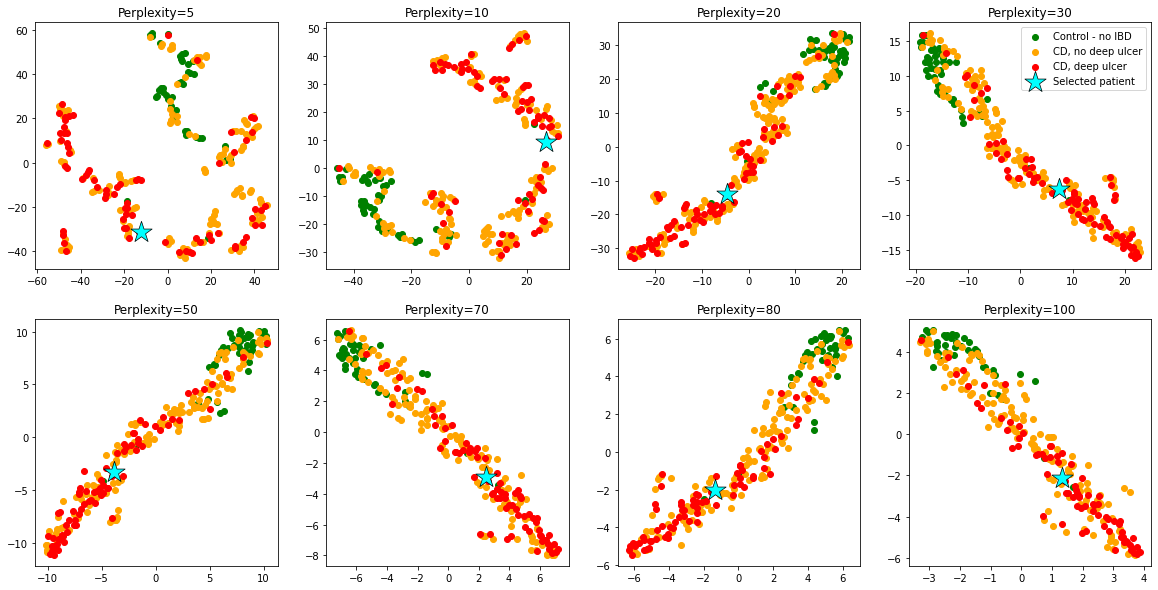

In [37]:


plot_tsne(tsne_dataset, selected_patient_idx)

Patient moves into the control cluster

### Modify gene expressions for the selected patient - 120 genes

In [38]:

selected_patient = full_dataset.loc[full_dataset.index.str.endswith(pid)]
selected_patient

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
199_CD_deep_ulcer,0.843521,0.116649,0.779461,0.835653,0.767721,0.720718,0.509658,0.659041,0.327517,0.759911,...,0.0,0.0,0.271399,0.0,0.0,0.084994,0.0,0.0,0.0,0.648814


In [39]:
with open("most_diff_genes_115", "rb") as fp:   # Unpickling
    most_diff_genes = pickle.load(fp)

most_diff_genes

['AADAC',
 'APOA4',
 'APOB',
 'APOC3',
 'AQP9',
 'C6',
 'CEACAM7',
 'CHI3L1',
 'ABCC2',
 'CNTFR',
 'CSF3',
 'CYP3A7',
 'CYP3A4',
 'FABP6',
 'FCGR1A',
 'FCGR1B',
 'FCGR3A',
 'FCGR3B',
 'FCN1',
 'FMO1',
 'FOLH1',
 'FPR1',
 'FPR2',
 'G6PC',
 'CXCL3',
 'GSTA1',
 'GSTA2',
 'GUCA2B',
 'HMGCS2',
 'IL1B',
 'IL1RN',
 'IL8',
 'CXCR1',
 'ITIH3',
 'KCNJ15',
 'LCN2',
 'MEP1B',
 'CXCL9',
 'MMP1',
 'MMP3',
 'MMP10',
 'MUC1',
 'OSM',
 'PGC',
 'PNLIPRP2',
 'S100A8',
 'S100A9',
 'S100A12',
 'SAA1',
 'SAA2',
 'CXCL11',
 'CXCL5',
 'SELE',
 'SFRP5',
 'SHBG',
 'SLC6A4',
 'SLC10A2',
 'SLC11A1',
 'SLC13A1',
 'TCN1',
 'TM4SF4',
 'TNFAIP6',
 'XPNPEP2',
 'CUBN',
 'SOAT2',
 'CYP4F2',
 'FCN3',
 'HCAR3',
 'ALDH1A2',
 'MGAM',
 'NAT8',
 'CLDN8',
 'SLC28A2',
 'SLC28A1',
 'LRAT',
 'CLEC5A',
 'DHDH',
 'DUOX2',
 'NAT8B',
 'TREM1',
 'UGT1A6',
 'SUSD2',
 'PROK2',
 'AGXT2',
 'FRMD1',
 'CDHR1',
 'OTOP2',
 'BPIFB1',
 'LYPD1',
 'CPO',
 'SLC34A3',
 'SLC23A3',
 'SLC5A12',
 'C9orf71',
 'C19orf59',
 'FOLH1B',
 'GSTA5',
 'FDCSP',
 

In [40]:
pid = '199_CD_deep_ulcer'
full_dataset = modify_expression(pid, most_diff_genes)
full_dataset.loc[full_dataset.index.str.endswith(pid)]

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
199_CD_deep_ulcer,0.843521,0.116649,0.779461,0.835653,0.767721,0.177126,0.509658,0.199594,0.327517,0.759911,...,0.0,0.0,0.271399,0.0,0.0,0.084994,0.0,0.0,0.0,0.648814


## Re-encoding the dataset

In [41]:
tsne_dataset = encode_dataset(auto_encoder, full_dataset)
tsne_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
3_CD_plain,0.184038,2.339928,-2.848547,2.238921,-0.098660,-2.755760,2.478440,2.870933,-5.466356,-2.026333,...,2.547081,1.383572,2.427234,2.865929,-0.163274,-3.770050,1.210512,-0.648534,1.803190,1.589187
99_CD_deep_ulcer,1.275044,1.291113,-5.610139,3.384315,2.245539,-0.819564,3.196398,5.119895,-9.695760,-0.783958,...,4.377275,3.687444,1.609472,2.005517,-0.716191,-3.060636,-1.913022,4.121701,0.436517,2.970902
274_CD_plain,-1.630861,-2.701211,1.806103,-1.766591,-0.298209,1.104201,-1.084524,-4.432734,6.683260,7.159960,...,-2.004012,-0.052921,-5.065886,-5.605465,0.750437,5.354219,-1.772298,3.064677,-1.464162,-1.131544
41_control,-1.776846,-1.675649,0.002026,-0.791054,-0.644348,0.149203,-2.156629,-2.135869,4.896315,4.508507,...,-0.299016,-2.025326,-4.034310,-3.195418,-0.485084,5.891967,-1.103716,0.657754,-2.877440,-1.110269
12_CD_plain,-1.087580,-0.409416,0.848334,-1.312025,-0.117040,0.137154,-0.625596,-2.552777,4.439072,4.934054,...,-1.151551,0.063565,-1.495467,-2.062488,-0.186146,2.601810,-0.385748,0.220722,-0.747434,-0.300530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161_CD_plain,0.553427,1.482405,-2.092350,1.215127,0.466568,-1.096624,0.362533,2.621416,-2.244193,-1.381687,...,0.524226,0.932031,1.105821,1.879601,-0.110101,-1.047359,-0.501216,1.043253,-0.471785,0.169607
196_CD_deep_ulcer,0.881301,1.928753,-3.739099,2.631689,0.668666,-1.680578,3.180453,3.282797,-6.757618,-1.740777,...,2.255735,2.134297,2.777829,2.296444,0.320221,-4.252476,-0.849981,1.127497,1.329103,2.158066
252_CD_deep_ulcer,1.305224,1.694444,-2.164611,2.650728,0.145489,-2.081185,2.233793,2.263578,-4.199594,-2.532762,...,1.930355,0.916092,1.982811,2.385948,0.424487,-3.786424,0.939309,0.797906,0.637679,0.482548
21_CD_deep_ulcer,2.028414,0.837274,-8.982298,4.798845,0.544431,-3.957136,4.613109,8.565804,-8.724510,-1.681170,...,4.314852,2.308494,1.489475,3.047104,-2.040719,-3.459915,-3.288708,3.903140,-0.773148,2.028943


## Replot tSNE

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

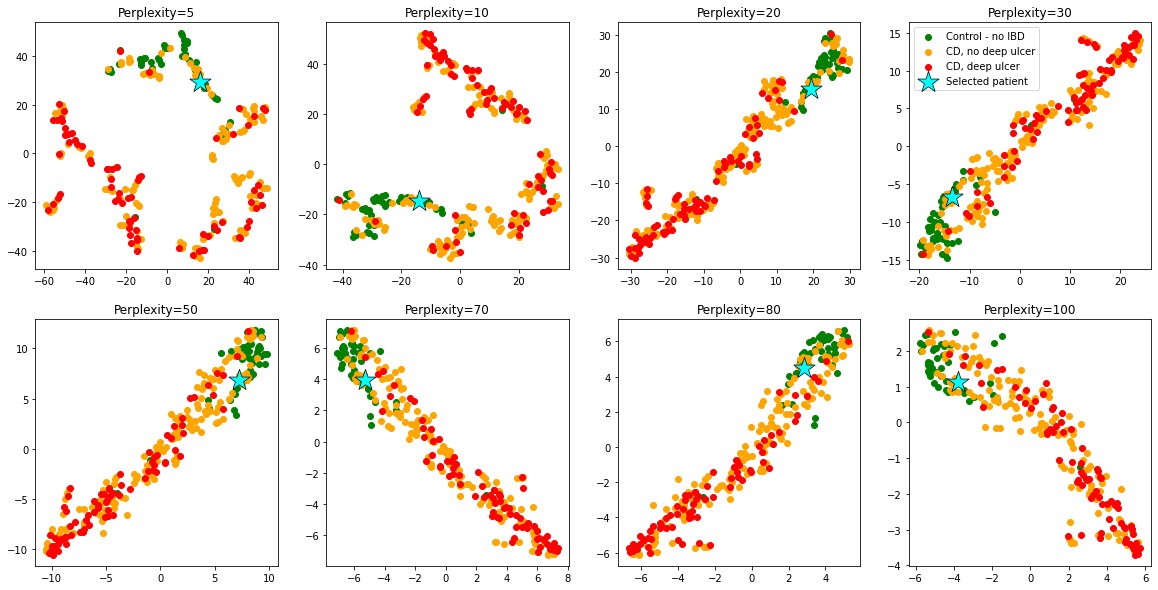

In [42]:


plot_tsne(tsne_dataset, selected_patient_idx)

Patient moves into the control cluster

## Class Contrastive: CD No Ulcer patient

In [43]:
pid = '208_CD_plain'
selected_patient = full_dataset.loc[full_dataset.index.str.endswith(pid)]
selected_patient

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
208_CD_plain,0.737158,0.607027,0.665845,0.778387,0.665326,0.34601,0.735952,0.384178,0.595651,0.725825,...,0.0,0.0,0.241306,0.0,0.0,0.0,0.0,0.0,0.0,0.512892


In [44]:
ind = full_dataset.index
selected_patient_idx = ind.get_loc(pid)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

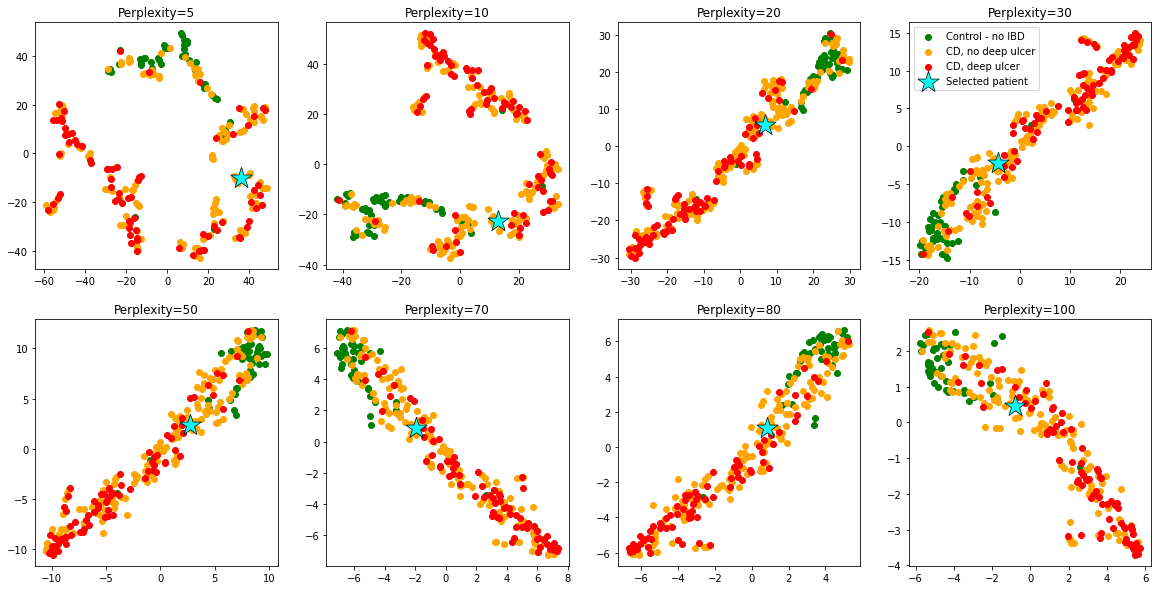

In [45]:


plot_tsne(tsne_dataset, selected_patient_idx)

### Modify gene expressions for the selected patient - 60 genes

In [46]:

selected_patient = full_dataset.loc[full_dataset.index.str.endswith(pid)]
selected_patient

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
208_CD_plain,0.737158,0.607027,0.665845,0.778387,0.665326,0.34601,0.735952,0.384178,0.595651,0.725825,...,0.0,0.0,0.241306,0.0,0.0,0.0,0.0,0.0,0.0,0.512892


In [47]:
with open("most_diff_genes_60", "rb") as fp:   # Unpickling
    most_diff_genes = pickle.load(fp)

most_diff_genes

['AADAC',
 'APOA4',
 'APOB',
 'APOC3',
 'C6',
 'CHI3L1',
 'ABCC2',
 'CYP3A7',
 'CYP3A4',
 'FABP6',
 'FCN1',
 'FPR1',
 'FPR2',
 'G6PC',
 'GSTA1',
 'GSTA2',
 'GUCA2B',
 'IL1RN',
 'CXCR1',
 'ITIH3',
 'SELE',
 'SFRP5',
 'SHBG',
 'SLC6A4',
 'SLC10A2',
 'SLC13A1',
 'TM4SF4',
 'TNFAIP6',
 'XPNPEP2',
 'SOAT2',
 'FCN3',
 'ALDH1A2',
 'SLC28A1',
 'DHDH',
 'NAT8B',
 'TREM1',
 'SUSD2',
 'FRMD1',
 'CDHR1',
 'LYPD1',
 'CPO',
 'SLC34A3',
 'SLC23A3',
 'GSTA5',
 'FADS6',
 'FLJ35424',
 'SERPINA9',
 'FAM151A',
 'HCAR2',
 'MS4A10',
 'LOC392364',
 'DUOXA2',
 'MUC5B']

In [48]:
pid = '208_CD_plain'
full_dataset = modify_expression(pid, most_diff_genes)
full_dataset.loc[full_dataset.index.str.endswith(pid)]

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
208_CD_plain,0.843521,0.607027,0.779461,0.835653,0.767721,0.34601,0.509658,0.384178,0.327517,0.759911,...,0.0,0.0,0.241306,0.0,0.0,0.0,0.0,0.0,0.0,0.512892


## Re-encoding the dataset

In [49]:
tsne_dataset = encode_dataset(auto_encoder, full_dataset)
tsne_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
3_CD_plain,0.184038,2.339928,-2.848547,2.238921,-0.098660,-2.755760,2.478440,2.870933,-5.466356,-2.026333,...,2.547081,1.383572,2.427234,2.865929,-0.163274,-3.770050,1.210512,-0.648534,1.803190,1.589187
99_CD_deep_ulcer,1.275044,1.291113,-5.610139,3.384315,2.245539,-0.819564,3.196398,5.119895,-9.695760,-0.783958,...,4.377275,3.687444,1.609472,2.005517,-0.716191,-3.060636,-1.913022,4.121701,0.436517,2.970902
274_CD_plain,-1.630861,-2.701211,1.806103,-1.766591,-0.298209,1.104201,-1.084524,-4.432734,6.683260,7.159960,...,-2.004012,-0.052921,-5.065886,-5.605465,0.750437,5.354219,-1.772298,3.064677,-1.464162,-1.131544
41_control,-1.776846,-1.675649,0.002026,-0.791054,-0.644348,0.149203,-2.156629,-2.135869,4.896315,4.508507,...,-0.299016,-2.025326,-4.034310,-3.195418,-0.485084,5.891967,-1.103716,0.657754,-2.877440,-1.110269
12_CD_plain,-1.087580,-0.409416,0.848334,-1.312025,-0.117040,0.137154,-0.625596,-2.552777,4.439072,4.934054,...,-1.151551,0.063565,-1.495467,-2.062488,-0.186146,2.601810,-0.385748,0.220722,-0.747434,-0.300530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161_CD_plain,0.553427,1.482405,-2.092350,1.215127,0.466568,-1.096624,0.362533,2.621416,-2.244193,-1.381687,...,0.524226,0.932031,1.105821,1.879601,-0.110101,-1.047359,-0.501216,1.043253,-0.471785,0.169607
196_CD_deep_ulcer,0.881301,1.928753,-3.739099,2.631689,0.668666,-1.680578,3.180453,3.282797,-6.757618,-1.740777,...,2.255735,2.134297,2.777829,2.296444,0.320221,-4.252476,-0.849981,1.127497,1.329103,2.158066
252_CD_deep_ulcer,1.305224,1.694444,-2.164611,2.650728,0.145489,-2.081185,2.233793,2.263578,-4.199594,-2.532762,...,1.930355,0.916092,1.982811,2.385948,0.424487,-3.786424,0.939309,0.797906,0.637679,0.482548
21_CD_deep_ulcer,2.028414,0.837274,-8.982298,4.798845,0.544431,-3.957136,4.613109,8.565804,-8.724510,-1.681170,...,4.314852,2.308494,1.489475,3.047104,-2.040719,-3.459915,-3.288708,3.903140,-0.773148,2.028943


## Replot tSNE

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

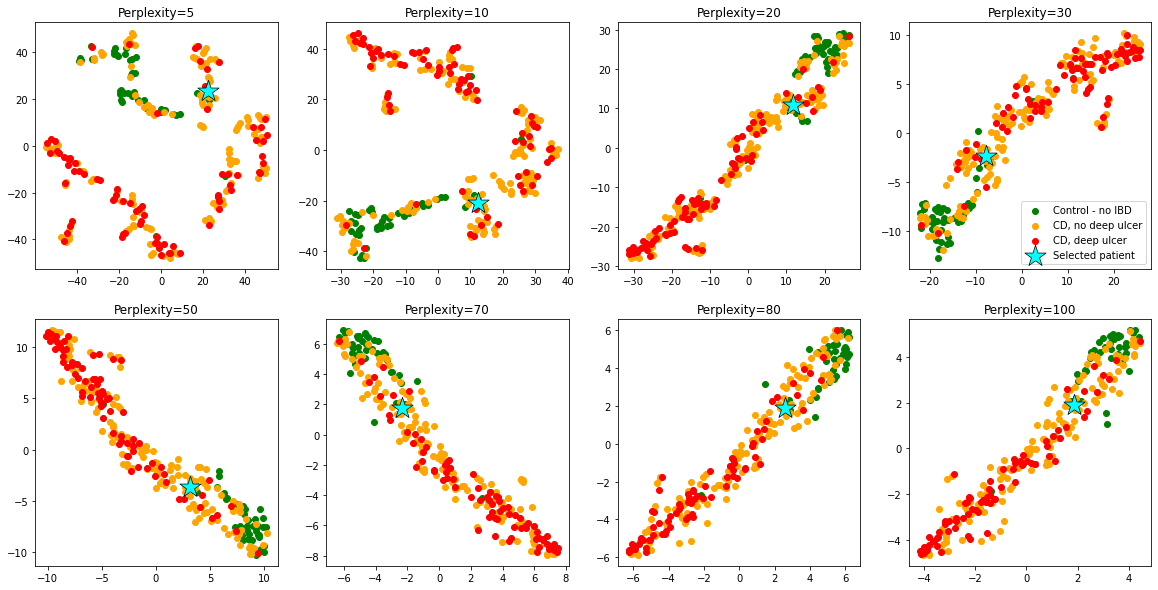

In [50]:


plot_tsne(tsne_dataset, selected_patient_idx)

Patient moves into the control cluster

### Modify gene expressions for the selected patient - 120 genes

In [51]:

selected_patient = full_dataset.loc[full_dataset.index.str.endswith(pid)]
selected_patient

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
208_CD_plain,0.843521,0.607027,0.779461,0.835653,0.767721,0.34601,0.509658,0.384178,0.327517,0.759911,...,0.0,0.0,0.241306,0.0,0.0,0.0,0.0,0.0,0.0,0.512892


In [52]:
with open("most_diff_genes_115", "rb") as fp:   # Unpickling
    most_diff_genes = pickle.load(fp)

most_diff_genes

['AADAC',
 'APOA4',
 'APOB',
 'APOC3',
 'AQP9',
 'C6',
 'CEACAM7',
 'CHI3L1',
 'ABCC2',
 'CNTFR',
 'CSF3',
 'CYP3A7',
 'CYP3A4',
 'FABP6',
 'FCGR1A',
 'FCGR1B',
 'FCGR3A',
 'FCGR3B',
 'FCN1',
 'FMO1',
 'FOLH1',
 'FPR1',
 'FPR2',
 'G6PC',
 'CXCL3',
 'GSTA1',
 'GSTA2',
 'GUCA2B',
 'HMGCS2',
 'IL1B',
 'IL1RN',
 'IL8',
 'CXCR1',
 'ITIH3',
 'KCNJ15',
 'LCN2',
 'MEP1B',
 'CXCL9',
 'MMP1',
 'MMP3',
 'MMP10',
 'MUC1',
 'OSM',
 'PGC',
 'PNLIPRP2',
 'S100A8',
 'S100A9',
 'S100A12',
 'SAA1',
 'SAA2',
 'CXCL11',
 'CXCL5',
 'SELE',
 'SFRP5',
 'SHBG',
 'SLC6A4',
 'SLC10A2',
 'SLC11A1',
 'SLC13A1',
 'TCN1',
 'TM4SF4',
 'TNFAIP6',
 'XPNPEP2',
 'CUBN',
 'SOAT2',
 'CYP4F2',
 'FCN3',
 'HCAR3',
 'ALDH1A2',
 'MGAM',
 'NAT8',
 'CLDN8',
 'SLC28A2',
 'SLC28A1',
 'LRAT',
 'CLEC5A',
 'DHDH',
 'DUOX2',
 'NAT8B',
 'TREM1',
 'UGT1A6',
 'SUSD2',
 'PROK2',
 'AGXT2',
 'FRMD1',
 'CDHR1',
 'OTOP2',
 'BPIFB1',
 'LYPD1',
 'CPO',
 'SLC34A3',
 'SLC23A3',
 'SLC5A12',
 'C9orf71',
 'C19orf59',
 'FOLH1B',
 'GSTA5',
 'FDCSP',
 

In [53]:
pid = '208_CD_plain'
full_dataset = modify_expression(pid, most_diff_genes)
full_dataset.loc[full_dataset.index.str.endswith(pid)]

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,LOC645195,RPS20P18,RPS6KB2,ERP29P1,MORF4L1P5,AQP4,LOC100421816,KRTAP10_9,TAAR1,PRR14
208_CD_plain,0.843521,0.607027,0.779461,0.835653,0.767721,0.177126,0.509658,0.199594,0.327517,0.759911,...,0.0,0.0,0.241306,0.0,0.0,0.0,0.0,0.0,0.0,0.512892


## Re-encoding the dataset

In [54]:
tsne_dataset = encode_dataset(auto_encoder, full_dataset)
tsne_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
3_CD_plain,0.184038,2.339928,-2.848547,2.238921,-0.098660,-2.755760,2.478440,2.870933,-5.466356,-2.026333,...,2.547081,1.383572,2.427234,2.865929,-0.163274,-3.770050,1.210512,-0.648534,1.803190,1.589187
99_CD_deep_ulcer,1.275044,1.291113,-5.610139,3.384315,2.245539,-0.819564,3.196398,5.119895,-9.695760,-0.783958,...,4.377275,3.687444,1.609472,2.005517,-0.716191,-3.060636,-1.913022,4.121701,0.436517,2.970902
274_CD_plain,-1.630861,-2.701211,1.806103,-1.766591,-0.298209,1.104201,-1.084524,-4.432734,6.683260,7.159960,...,-2.004012,-0.052921,-5.065886,-5.605465,0.750437,5.354219,-1.772298,3.064677,-1.464162,-1.131544
41_control,-1.776846,-1.675649,0.002026,-0.791054,-0.644348,0.149203,-2.156629,-2.135869,4.896315,4.508507,...,-0.299016,-2.025326,-4.034310,-3.195418,-0.485084,5.891967,-1.103716,0.657754,-2.877440,-1.110269
12_CD_plain,-1.087580,-0.409416,0.848334,-1.312025,-0.117040,0.137154,-0.625596,-2.552777,4.439072,4.934054,...,-1.151551,0.063565,-1.495467,-2.062488,-0.186146,2.601810,-0.385748,0.220722,-0.747434,-0.300530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161_CD_plain,0.553427,1.482405,-2.092350,1.215127,0.466568,-1.096624,0.362533,2.621416,-2.244193,-1.381687,...,0.524226,0.932031,1.105821,1.879601,-0.110101,-1.047359,-0.501216,1.043253,-0.471785,0.169607
196_CD_deep_ulcer,0.881301,1.928753,-3.739099,2.631689,0.668666,-1.680578,3.180453,3.282797,-6.757618,-1.740777,...,2.255735,2.134297,2.777829,2.296444,0.320221,-4.252476,-0.849981,1.127497,1.329103,2.158066
252_CD_deep_ulcer,1.305224,1.694444,-2.164611,2.650728,0.145489,-2.081185,2.233793,2.263578,-4.199594,-2.532762,...,1.930355,0.916092,1.982811,2.385948,0.424487,-3.786424,0.939309,0.797906,0.637679,0.482548
21_CD_deep_ulcer,2.028414,0.837274,-8.982298,4.798845,0.544431,-3.957136,4.613109,8.565804,-8.724510,-1.681170,...,4.314852,2.308494,1.489475,3.047104,-2.040719,-3.459915,-3.288708,3.903140,-0.773148,2.028943


## Replot tSNE

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

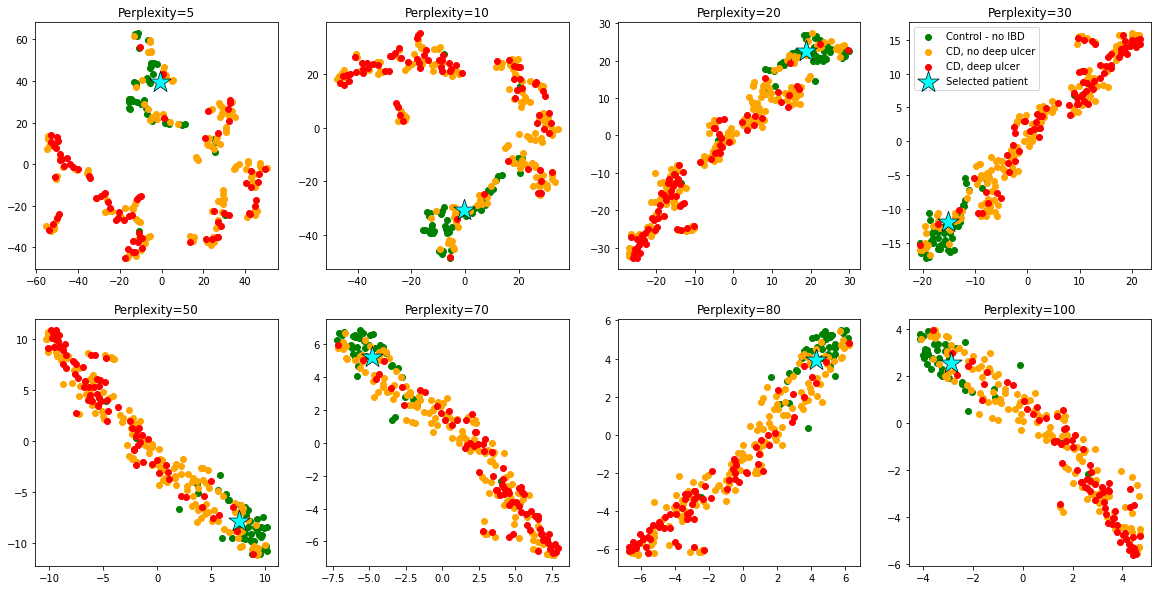

In [55]:


plot_tsne(tsne_dataset, selected_patient_idx)

Patient moves into the control cluster